This is the INDUSTRY data with datapoints from month to month

In [1]:
import pandas as pd
from pathlib import Path

industry_data = pd.read_csv("/Users/bogdansandoiu/Documents/Neural Networks/Stocks Forecasting/Stocks-forecasting/data/raw/Industry_Month.csv", sep=';', decimal=',', encoding='utf-8-sig')
industry_data.head()

,Series,N,NF,Category,Starting Year,Starting Month,1,2,3,4,...,135,136,137,138,139,140,141,142,143,144
0,N1877,141,18,INDUSTRY,1982,1,3650.16,3072.22,3156.06,2893.04,...,4220.94,3722.44,3861.44,4460.38,5173.9,5189.24,4388.56,NaN,NaN,NaN
1,N1878,141,18,INDUSTRY,1982,1,5379.20,5338.00,5977.00,5585.60,...,4716.60,5034.20,5864.60,5321.20,4715.0,3937.00,3417.80,NaN,NaN,NaN
2,N1879,144,18,INDUSTRY,1977,1,9315.00,9636.00,11657.50,9169.00,...,9215.00,7323.50,9636.50,8811.50,7511.5,6983.50,10511.00,11278.0,7917.5,11259.5
3,N1880,134,18,INDUSTRY,1983,1,5050.00,5025.00,5080.00,5145.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N1881,144,18,INDUSTRY,1977,1,1955.00,2180.00,2375.00,2315.00,...,9515.00,7475.00,6845.00,7215.00,8305.0,7160.00,8175.00,7415.0,8260.0,7190.0


Here we are checking how many Ids are in the dataset, we have 333 Ids

In [2]:
industry_data.shape

(333, 150)

Here we are dropping the Category column because we already know that we are working with INDUSTRY dataset

In [3]:
industry_data = industry_data.drop(columns=["Category"])
industry_data.head()

,Series,N,NF,Starting Year,Starting Month,1,2,3,4,5,...,135,136,137,138,139,140,141,142,143,144
0,N1877,141,18,1982,1,3650.16,3072.22,3156.06,2893.04,2983.52,...,4220.94,3722.44,3861.44,4460.38,5173.9,5189.24,4388.56,NaN,NaN,NaN
1,N1878,141,18,1982,1,5379.20,5338.00,5977.00,5585.60,5594.20,...,4716.60,5034.20,5864.60,5321.20,4715.0,3937.00,3417.80,NaN,NaN,NaN
2,N1879,144,18,1977,1,9315.00,9636.00,11657.50,9169.00,8357.00,...,9215.00,7323.50,9636.50,8811.50,7511.5,6983.50,10511.00,11278.0,7917.5,11259.5
3,N1880,134,18,1983,1,5050.00,5025.00,5080.00,5145.00,5245.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N1881,144,18,1977,1,1955.00,2180.00,2375.00,2315.00,2060.00,...,9515.00,7475.00,6845.00,7215.00,8305.0,7160.00,8175.00,7415.0,8260.0,7190.0


Here we are enumerating all the columns which are not strings(the number of datapoints for each id)

In [4]:
meta_columns = ["Series", "N", "NF", "Starting Year", "Starting Month"]
value_columns = [c for c in industry_data.columns if c not in meta_columns]
print(value_columns)


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144']


Here we check if we have multiple horizions in our dataset, but as you can see the task is to predict the next 18 time steps

In [5]:
industry_data["NF"].unique()

array([18])

Here we check if we have different number of datapoints for each id, as you can see each Id can have different number of data points

In [6]:
industry_data["N"].unique()

array([141, 144, 134, 140, 128, 133, 136, 142, 139,  96, 143, 122, 137])

In [19]:
ids_to_data_points = (industry_data
                   .groupby('Series')['N']
                   .apply(lambda s: sorted(s.unique()))
                   .sort_index())

print(ids_to_data_points)

Series
N1877    [141]
N1878    [141]
N1879    [144]
N1880    [134]
N1881    [144]
         ...  
N2205    [134]
N2206    [134]
N2207    [144]
N2208    [134]
N2209    [144]
Name: N, Length: 333, dtype: object


Here we check how many uniques year we have and as you can see there are 7 unique years 

In [7]:
industry_data["Starting Year"].unique()

array([1982, 1977, 1983, 1981, 1979, 1980, 1978])

In [20]:
ids_to_years = (industry_data
                   .groupby('Series')['Starting Year']
                   .apply(lambda s: sorted(s.unique()))
                   .sort_index())

print(ids_to_years)

Series
N1877    [1982]
N1878    [1982]
N1879    [1977]
N1880    [1983]
N1881    [1977]
          ...  
N2205    [1983]
N2206    [1983]
N2207    [1982]
N2208    [1983]
N2209    [1982]
Name: Starting Year, Length: 333, dtype: object


Here we check how many unique months we have, as you can see there are 4 unique months

In [8]:
industry_data["Starting Month"].unique()

array([ 1, 12,  3,  6])

In [21]:
ids_to_months = (industry_data
                   .groupby('Series')['Starting Month']
                   .apply(lambda s: sorted(s.unique()))
                   .sort_index())

print(ids_to_months)

Series
N1877    [1]
N1878    [1]
N1879    [1]
N1880    [1]
N1881    [1]
        ... 
N2205    [1]
N2206    [1]
N2207    [1]
N2208    [1]
N2209    [1]
Name: Starting Month, Length: 333, dtype: object


Here we are checking which years have what months 

In [9]:
years_to_months = (industry_data
                   .groupby('Starting Year')['Starting Month']
                   .apply(lambda s: sorted(s.unique()))
                   .sort_index())

print(years_to_months)

Starting Year
1977           [1]
1978           [1]
1979           [1]
1980           [1]
1981       [1, 12]
1982    [1, 3, 12]
1983        [1, 6]
Name: Starting Month, dtype: object


Here we check how many datapoints(months) each year have 

In [10]:
industry_data['Starting Year'].value_counts().sort_index()

Starting Year
1977      9
1978     36
1979     36
1980     13
1981     28
1982    109
1983    102
Name: count, dtype: int64

Here we check how many N has each year

In [11]:
years_to_values_in_row = (industry_data
                   .groupby('Starting Year')['N']
                   .apply(lambda s: sorted(s.unique()))
                   .sort_index())

print(years_to_values_in_row)

Starting Year
1977                    [96, 136, 137, 144]
1978                             [143, 144]
1979                             [140, 144]
1980              [128, 141, 142, 143, 144]
1981                             [139, 144]
1982    [133, 134, 139, 141, 142, 143, 144]
1983                        [122, 133, 134]
Name: N, dtype: object


Here we check the rows that have value 1977 for Starting Year

In [12]:
industry_data[industry_data['Starting Year'] == 1977]

,Series,N,NF,Starting Year,Starting Month,1,2,3,4,5,...,135,136,137,138,139,140,141,142,143,144
2,N1879,144,18,1977,1,9315.0,9636.0,11657.5,9169.0,8357.0,...,9215.0,7323.5,9636.5,8811.5,7511.5,6983.5,10511.0,11278.0,7917.5,11259.5
4,N1881,144,18,1977,1,1955.0,2180.0,2375.0,2315.0,2060.0,...,9515.0,7475.0,6845.0,7215.0,8305.0,7160.0,8175.0,7415.0,8260.0,7190.0
55,N1932,136,18,1977,1,5171.0,5228.0,5325.0,5197.0,5133.0,...,6302.0,6257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,N1933,136,18,1977,1,4150.0,4060.0,4335.0,4010.0,3980.0,...,6815.0,6815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,N1985,144,18,1977,1,15950.0,19100.0,10625.0,12000.0,20075.0,...,2450.0,3400.0,12100.0,16000.0,17375.0,17275.0,23375.0,8575.0,13000.0,14075.0
134,N2011,96,18,1977,1,2992.0,3256.0,4290.0,4190.0,4080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,N2104,144,18,1977,1,3652.0,3830.0,4176.0,4388.0,4384.0,...,6554.0,6578.0,6656.0,5482.0,5004.0,5334.0,5784.0,5468.0,4932.0,5908.0
234,N2111,144,18,1977,1,980.0,1154.0,1014.0,1362.0,1328.0,...,2946.0,3032.0,2922.0,2430.0,2200.0,2130.0,2496.0,1824.0,1814.0,1996.0
292,N2169,137,18,1977,1,4285.0,3705.0,3780.0,4005.0,4905.0,...,5165.0,4805.0,5145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we create a new DF that transforms all the columns into months. The DF has now timesteps for each row(with their specific id)

In [13]:
def expand_row(row):
    # start is a pd.Timestamp(" Starting Year-Starting Month-1 ")
    start = pd.Timestamp(year=int(row['Starting Year']),
                         month=int(row['Starting Month']),
                         day=1)
    # this shows how many monthly values are available in a row
    n = int(row['N'])  

    # grab only the first n columns worth of values, because the others are Nans
    vals = row[value_columns].values[:n].astype(float)

    # Creates n monthly timestamps starting at the start date (MS = month start)
    dates = pd.date_range(start=start, periods=n, freq='MS')
    
    # Build a tidy DataFrame with three columns:
    # Series (the series id from the row)
    # date (the monthly timestamps)
    # value (the numeric values)
    out = pd.DataFrame({
        'Series': row['Series'],
        'date': dates,
        'value': vals
    })
    return out

#Runs this conversion for every row in your original dataframe. Concatenates all those per-row DataFrames into one long table
long_df = pd.concat(industry_data.apply(expand_row, axis=1).to_list(),
                    ignore_index=True)
long_df

,Series,date,value
0,N1877,1982-01-01,3650.16
1,N1877,1982-02-01,3072.22
2,N1877,1982-03-01,3156.06
3,N1877,1982-04-01,2893.04
4,N1877,1982-05-01,2983.52
...,...,...,...
46621,N2209,1993-08-01,3450.00
46622,N2209,1993-09-01,3470.00
46623,N2209,1993-10-01,3990.00
46624,N2209,1993-11-01,3820.00


In [14]:
import os
from pathlib import Path

main_directory = Path.cwd().resolve().parent
print(main_directory)

out_dir = main_directory / "data/raw"                 
os.makedirs(out_dir, exist_ok=True) 
     
csv_path = os.path.join(out_dir, "long_df.csv")
long_df.to_csv(csv_path, index=False)

print("Saved:", csv_path)

/Users/bogdansandoiu/Documents/Neural Networks/Stocks Forecasting/Stocks-forecasting
Saved: /Users/bogdansandoiu/Documents/Neural Networks/Stocks Forecasting/Stocks-forecasting/data/raw/long_df.csv


Here we are able to see that there are different values at one timestep because there are multiple ids

In [15]:
long_df[long_df["date"] ==  pd.Timestamp('1982-01-01')]

,Series,date,value
0,N1877,1982-01-01,3650.16
141,N1878,1982-01-01,5379.20
342,N1879,1982-01-01,5424.50
620,N1881,1982-01-01,2525.00
705,N1882,1982-01-01,4920.00
...,...,...,...
42431,N2179,1982-01-01,2755.00
42575,N2180,1982-01-01,2208.00
44856,N2197,1982-01-01,2416.00
46204,N2207,1982-01-01,800.00


In [16]:
long_df[long_df["date"] ==  pd.Timestamp('1982-01-01')].count()

Series    229
date      229
value     229
dtype: int64

Here we plot for a single id 

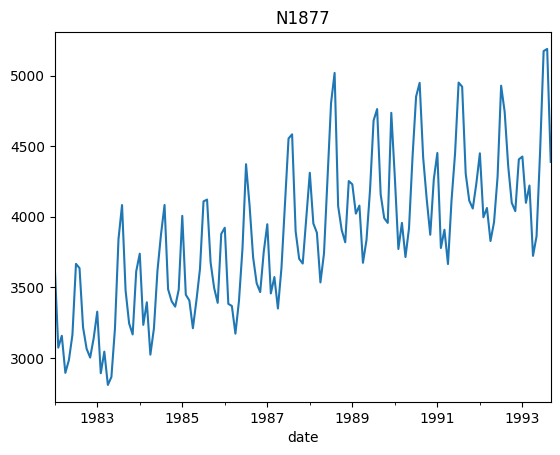

In [17]:
long_df.query("Series == 'N1877'").sort_values('date').set_index('date')['value'].plot(title='N1877'); 

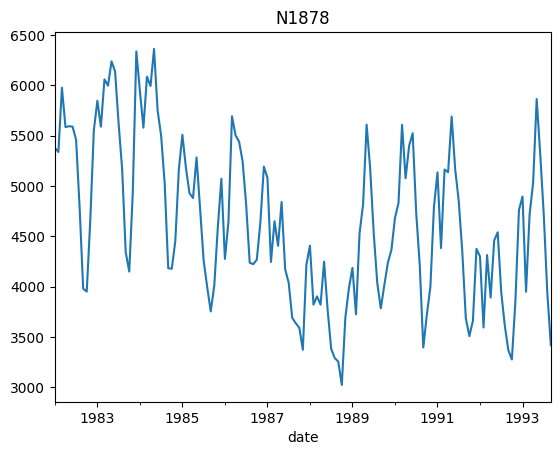

In [18]:
long_df.query("Series == 'N1878'").sort_values('date').set_index('date')['value'].plot(title='N1878'); 